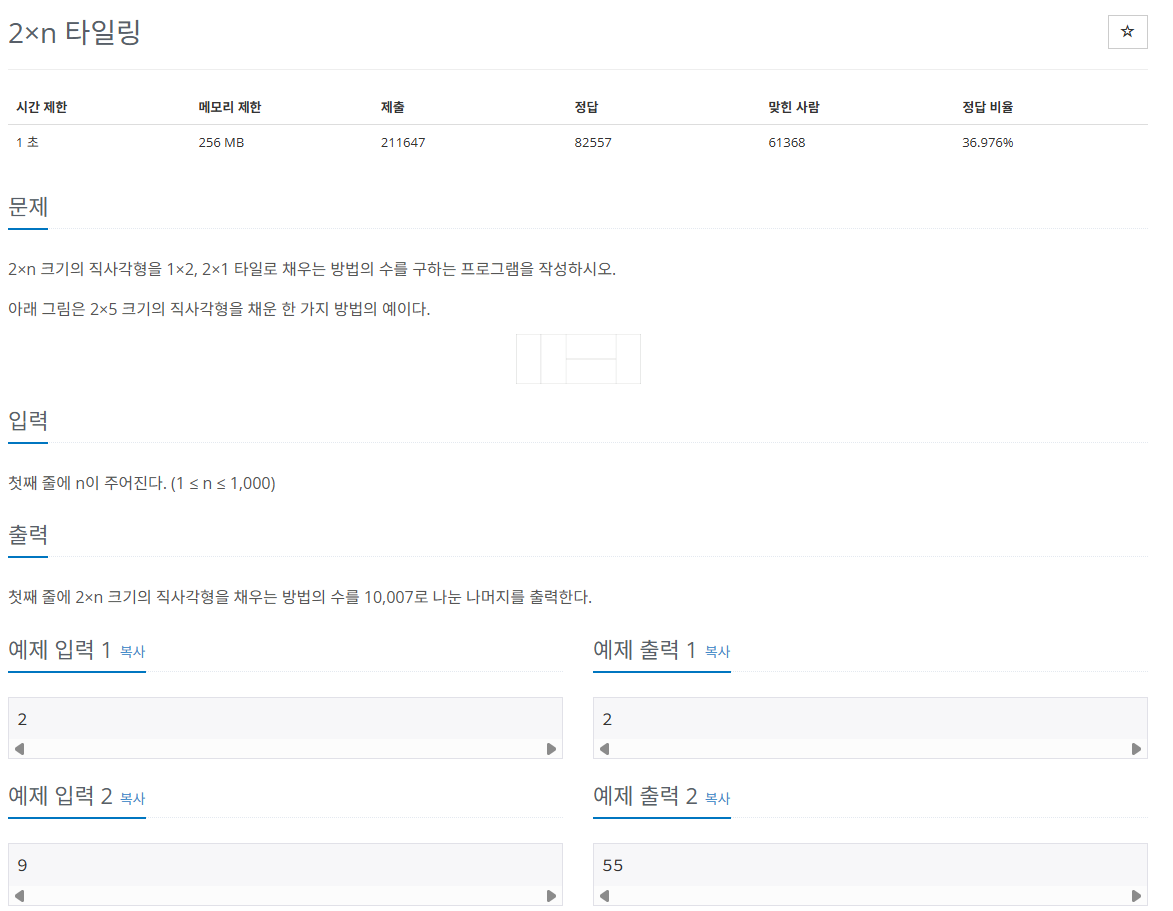

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-16 000429.png")
img

In [2]:
import sys

#input = sys.stdin.readline
n=int(input().strip())

dp=[-1 for _ in range(1001)]
dp[1]=1
dp[2]=2

if n>=3:
    for i in range(3,n+1):
        dp[i]=dp[i-1]+dp[i-2]

ans=dp[n]

print(ans)


70330367711422815821835254877183549770181269836358732742604905087154537118196933579742249494562611733487750449241765991088186363265450223647106012053374121273867339111198139373125598767690091902245245323403501




-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.0 / 5.0 점**

      * **평가:** **거의 완벽한 정답에 가깝습니다.** DP 점화식을 정확히 찾아냈고, `n=1, 2`일 때의 예외 처리와 DP 테이블 크기 설정까지 꼼꼼하게 처리했습니다. 다만, **나머지(modulo) 연산의 위치**에 이 문제의 마지막 함정이 숨어있습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 훌륭한 로직을 그대로 유지하면서, 나머지 연산을 각 단계마다 적용하여 중간 계산 값이 불필요하게 커지는 것을 방지한, 더 안정적이고 효율적인 코드입니다.

-----

### \#\# Gemini 추천 코드 (나머지 연산 최적화)

```python
import sys

input = sys.stdin.readline
n = int(input().strip())

# DP 테이블을 넉넉하게 생성
dp = [0] * 1001 
dp[1] = 1
dp[2] = 2

# 3부터 n까지 DP 테이블을 채워나감
for i in range(3, n + 1):
    # 점화식을 계산할 때마다 나머지 연산을 수행
    dp[i] = (dp[i-1] + dp[i-2]) % 10007

# 최종 결과 출력
print(dp[n])
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 DP 알고리즘을 사용했습니다.** 피보나치 수열과 동일한 점화식을 사용하는 Bottom-up 방식은 O(N)의 시간 복잡도를 가지므로, 이 문제에 대한 가장 효율적인 해법입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

  * **평가:** 매우 훌륭합니다. `strip()`으로 입력을 안전하게 처리했고, DP 테이블을 미리 넉넉하게 할당하여 `n=1, 2`일 때의 `IndexError`를 방지하는 등 견고한 코드를 작성했습니다.

-----

### \#\# 3. 또 다른 측면: 나머지 연산(Modulo Operation)의 위치

이번 코드에서 논의할 수 있는 가장 중요한 부분은 바로 **'언제 나머지 연산을 해야 하는가'** 입니다.

  * **사용자님의 코드:** `for` 루프를 통해 `dp` 테이블을 모두 계산한 뒤, **마지막에 한 번만** `dp[n] % 10007`을 수행합니다.
  * **추천 코드:** `for` 루프 안에서 값을 계산할 때마다, 즉 **매 단계마다** `% 10007` 연산을 수행합니다.

#### **왜 매 단계마다 해야 할까요?**

`n`이 커지면 `dp[n]`의 값은 기하급수적으로 커집니다. 파이썬은 매우 큰 정수도 알아서 처리해주지만, 이 과정에서 눈에 보이지 않는 성능 저하가 발생할 수 있습니다. 다른 언어(C++, Java)에서는 정수형의 범위를 넘어서는 '오버플로우' 에러가 발생하여 아예 틀린 답이 나오게 됩니다.

다행히 나머지 연산에는 다음과 같은 중요한 성질이 있습니다.

> **`(A + B) % C = ((A % C) + (B % C)) % C`**

이것이 의미하는 바는, "A와 B를 더한 뒤 나머지를 구하는 것"과 "A와 B 각각의 나머지를 먼저 구해서 더한 뒤 다시 나머지를 구하는 것"의 결과가 **같다**는 것입니다.

따라서 `dp[i-1]`과 `dp[i-2]`가 이미 10007보다 작은 나머지 값들이라면, 이 둘을 더한 뒤 바로 나머지 연산을 해줘도 최종 결과에는 아무런 영향을 주지 않습니다. 오히려 `dp` 테이블에 저장되는 모든 값을 10007 미만으로 작게 유지하여, 코드를 훨씬 더 빠르고 안정적으로 만들어 줍니다.

이 '중간 과정에서의 나머지 연산'은 DP나 조합론 문제에서 매우 흔하게 사용되는 핵심 테크닉이니, 꼭 기억해두시면 좋습니다.